https://github.com/gzr2017/ImageProcessing100Wen/blob/master/Question_21_30/README.md

## 21. 直方图归一化（ Histogram Normalization ）
来归一化直方图吧。

有时直方图会偏向一边。

比如说，数据集中在$0$处（左侧）的图像全体会偏暗，数据集中在$255$处（右侧）的图像会偏亮。

如果直方图有所偏向，那么其**动态范围（ dynamic range ）**就会较低。

为了使人能更清楚地看见图片，让直方图归一化、平坦化是十分必要的。

这种归一化直方图的操作被称作灰度变换（Grayscale Transformation）。像素点取值范围从$[c,d]$转换到$[a,b]$的过程由下式定义。这回我们将imori_dark.jpg的灰度扩展到$[0, 255]$范围： $$ x_{out}= \begin{cases} a& (\text{if}\quad x_{in}<c)\\ \frac{b-a}{d-c}\ (x_{in}-c)+a&(\text{else if}\quad c\leq x_{in}<d)\\ b&(\text{else}) \end{cases} $$

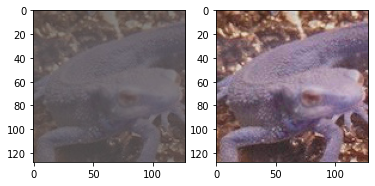

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_normalization(_img, a=0, b=255):
    img = _img.astype("float32")
    c = img.min()
    d = img.max()
    
    out = (b-a)/(d-c)*(img - c) + a
    return out.astype("uint8")

img = cv2.imread('../Question_21_30/imori_dark.jpg')
img2 = histogram_normalization(img)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()


## 22. 直方图操作
让直方图的平均值$m_0=128$，标准差$s_0=52$​吧！

这里并不是变更直方图的动态范围，而是让直方图变得平坦。

可以使用下式将平均值为$m$标准差为$s$的直方图变成平均值为$m_0$标准差为$s_0$的直方图： $$ x_{out}=\frac{s_0}{s}\ (x_{in}-m)+m_0 $$

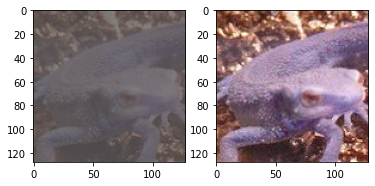

In [20]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_adjust(_img, m0=128, s0=52):
    img = _img.astype("float32")
    m = img.mean()
    #_s = (np.sum((img - m)**2)/img.size)**0.5
    s = img.std()
    
    out = s0/s*(img - m) + m0
    return np.clip(out,0,255).astype("uint8")

img = cv2.imread('../Question_21_30/imori_dark.jpg')
img2 = histogram_adjust(img)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()


## 23. 直方图均衡化（ Histogram Equalization ）
来让均匀化直方图吧！

直方图均衡化是使直方图变得平坦的操作，是不需要计算上面的问题中的平均值、标准差等数据使直方图的值变得均衡的操作。

均衡化操作由以下式子定义。$S$是总的像素数；$Z_{max}$是像素点的最大取值（在这里是$255$）；$h(z)$表示取值为$z$的累积分布函数： $$ Z' = \frac{Z_{max}}{S} \ \sum\limits_{i=0}^z\ h(i) $$

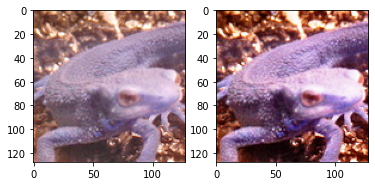

In [22]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(_img, z_max=255):
    img = _img.astype("float32")
    out = img.copy()
    hi = 0
    for i in range(1, 255):
        cond = img == i
        hi += cond.sum()
        z = 1. * z_max / img.size * hi
        out[cond] = z

    return np.clip(out,0,255).astype("uint8")

img = cv2.imread('../Question_21_30/imori.jpg')
img2 = histogram_equalization(img)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()


## 24. 伽玛校正（Gamma Correction）^1
对imori_gamma.jpg进行伽马校正（$c=1$，$g=2.2$）吧！

伽马校正用来对照相机等电子设备传感器的非线性光电转换特性进行校正。如果图像原样显示在显示器等上，画面就会显得很暗。伽马校正通过预先增大 RGB 的值来排除显示器的影响，达到对图像修正的目的。

由于下式引起非线性变换，在该式中，$x$被归一化，限定在$[0,1]$范围内。$c$是常数，$g$为伽马变量（通常取$2.2$）： $$ x' = c\ {I_{in}}^ g $$ 因此，使用下面的式子进行伽马校正： $$ I_{out} ={\frac{1}{c}\ I_{in}} ^ {\frac{1}{g}} $$

In [23]:
pass

## 25. 最邻近插值（ Nearest-neighbor Interpolation ）
使用最邻近插值将图像放大$1.5$倍吧！

最近邻插值在图像放大时补充的像素取最临近的像素的值。由于方法简单，所以处理速度很快，但是放大图像画质劣化明显。

使用下面的公式放大图像吧！$I'$为放大后图像，$I$为放大前图像，$a$为放大率，方括号是四舍五入取整操作：$$ I'(x,y) = I([\frac{x}{a}], [\frac{y}{a}]) $$